In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
#read source files
zip_path='/Users/malgorzatakrolikowska/Documents/github repository/kaggle/projects/titanic/Data/titanic.zip'
with zipfile.ZipFile(zip_path, 'r') as z:

    dfs={}
    for i in z.namelist():
        name = i[:-4]
        with z.open(i) as f:
            dfs[name] = pd.read_csv(f)
print(dfs)


{'gender_submission':      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns], 'test':      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1     

In [3]:
train=dfs['train']

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train['family_size']=train['SibSp']+train['Parch']+1
train.groupby(['family_size'], as_index=False)['Survived'].mean()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [9]:
family_map = { 1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7:'Medium', 8: 'Big', 11: 'Big'}
train['family_group']=train['family_size'].map(family_map)
train.groupby(['family_group'], as_index=False)['Survived'].mean()

,family_group,Survived
0,Alone,0.303538
1,Big,0.000000
2,Medium,0.204082
3,Small,0.578767


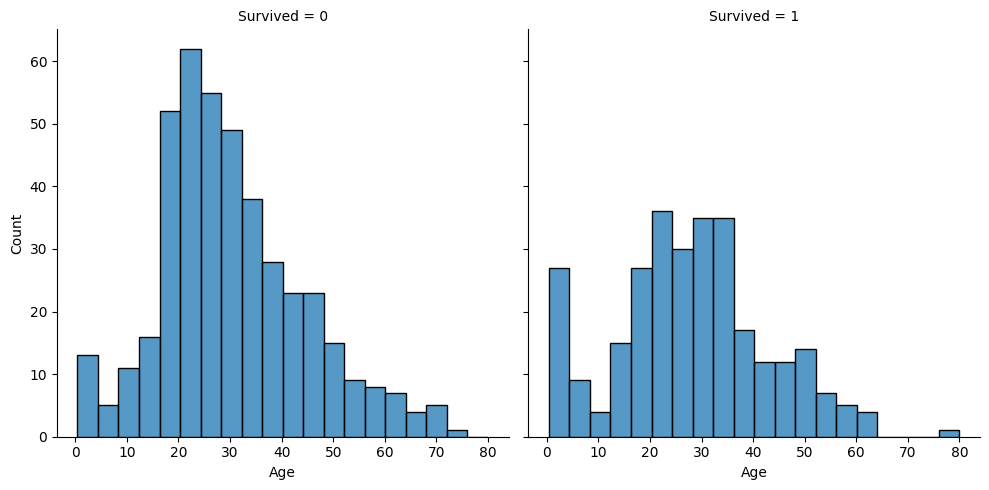

In [10]:
sns.displot(train, x='Age', col='Survived')

In [11]:
train['age_cut'] = pd.qcut(train['Age'], 8)
train.groupby(['age_cut'], as_index=False)['Survived'].mean()

/var/folders/yj/8kj2nbts5_b43hpcx5mkp6ph0000gn/T/ipykernel_4180/2472742333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['age_cut'], as_index=False)['Survived'].mean()


,age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [12]:
train['Fare_cut'] = pd.qcut(train['Fare'],8)
train.groupby(['Fare_cut'], as_index=False)['Survived'].mean()

/var/folders/yj/8kj2nbts5_b43hpcx5mkp6ph0000gn/T/ipykernel_4180/539271075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Fare_cut'], as_index=False)['Survived'].mean()


,Fare_cut,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [13]:
train['title']=train['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x: x.strip())
train.groupby(['title'], as_index=False)['Survived'].mean()
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [14]:
title_mapping = {
    # --- Mężczyźni ---
    "Mr": "male",

    # --- Kobiety zamężne / dorosłe ---
    "Mrs": "married_female",
    "Mme": "married_female",   # francuskie "Madame"

    # --- Kobiety niezamężne ---
    "Miss": "unmarried_female",
    "Ms": "unmarried_female",
    "Mlle": "unmarried_female",  # francuskie "Mademoiselle"

    # --- Dzieci ---
    "Master": "child",

    # --- Szlachta / arystokracja ---
    "Lady": "nobility",
    "the Countess": "nobility",
    "Sir": "nobility",
    "Don": "nobility",
    "Jonkheer": "nobility",  # niderlandzki tytuł szlachecki

    # --- Służba wojskowa ---
    "Col": "military",
    "Major": "military",
    "Capt": "military",

    # --- Profesje / religijni ---
    "Dr": "professional",
    "Rev": "religious"
}

In [15]:
train['title_group']=train['title'].map(title_mapping)
train.groupby(['title_group'], as_index=False)['Survived'].mean()

,title_group,Survived
0,child,0.575000
1,male,0.156673
2,married_female,0.793651
3,military,0.400000
4,nobility,0.600000
5,professional,0.428571
6,religious,0.000000
7,unmarried_female,0.702703


In [16]:
train['name_len']=train['Name'].apply(lambda x: len(x))
train.groupby('name_len')['Survived'].mean()

name_len
12    0.500000
13    0.500000
14    0.333333
15    0.133333
16    0.230769
17    0.214286
18    0.200000
19    0.234375
20    0.282051
21    0.325000
22    0.315789
23    0.282051
24    0.372093
25    0.327273
26    0.224490
27    0.360000
28    0.372093
29    0.500000
30    0.432432
31    0.400000
32    0.565217
33    0.545455
34    0.428571
35    1.000000
36    0.333333
37    0.700000
38    0.444444
39    0.444444
40    0.428571
41    1.000000
42    0.200000
43    0.800000
44    1.000000
45    0.777778
46    0.571429
47    0.727273
48    1.000000
49    1.000000
50    1.000000
51    1.000000
52    0.750000
53    1.000000
54    0.000000
55    0.500000
56    0.666667
57    0.500000
61    1.000000
65    1.000000
67    1.000000
82    1.000000
Name: Survived, dtype: float64

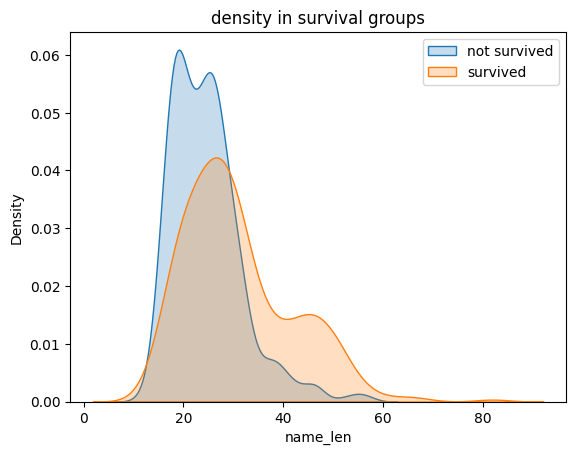

In [17]:
sns.kdeplot(data=train[train["Survived"]==0]["name_len"], fill=True, label="not survived")
sns.kdeplot(data=train[train["Survived"]==1]["name_len"], fill=True, label="survived")

plt.legend()
plt.title("density in survival groups")
plt.xlabel("name_len")
plt.show()

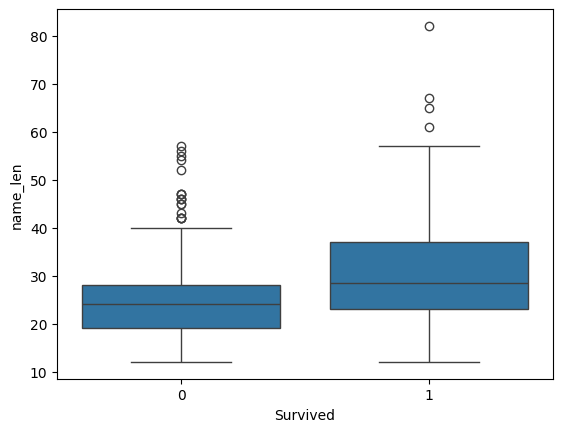

In [18]:
sns.boxplot(data=train, x="Survived", y="name_len")
plt.show()

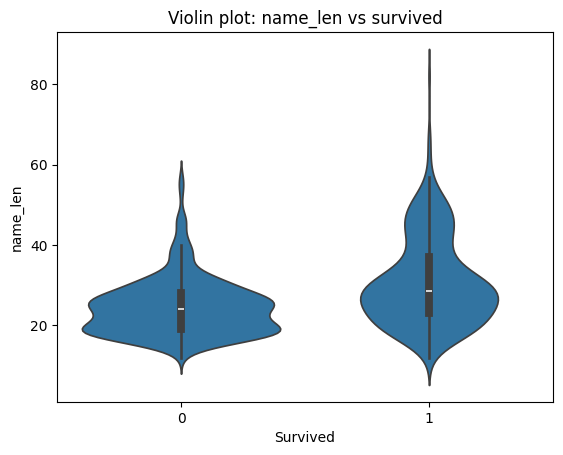

In [19]:
sns.violinplot(data=train, x="Survived", y="name_len")
plt.title("Violin plot: name_len vs survived")
plt.show()

In [20]:
train['name_len_cut'] = pd.qcut(train['name_len'],8)
train.groupby(['name_len_cut'],as_index=False)['Survived'].mean()

/var/folders/yj/8kj2nbts5_b43hpcx5mkp6ph0000gn/T/ipykernel_4180/3748231076.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['name_len_cut'],as_index=False)['Survived'].mean()


,name_len_cut,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [43]:
ticket_tmp=train['Ticket'].str.split(pat=' ', expand=True)


def take_last(d):
    if not pd.isna(d[2]):
        result = d[2]
    elif  not pd.isna(d[1]):
        result = d[1]
    else:
        result = d[0]
    return result

ticket_tmp['ticket_no']=ticket_tmp.apply(take_last, axis =1)
train['ticket_no_prefix']=ticket_tmp['ticket_no'].astype(str).str[:1]

In [44]:
train.groupby('ticket_no_prefix')['Survived'].agg(['mean','count','std']).round(2).query("count>=10")

,mean,count,std
ticket_no_prefix,,,
1,0.61,231,0.49
2,0.41,230,0.49
3,0.26,367,0.44
4,0.13,15,0.35
6,0.07,14,0.27
7,0.27,15,0.46


In [61]:
ticket_split_tmp=train['Ticket'].str.split(pat=' ', expand=True)

def take_prefix(d):
    if pd.isna(d[1]):
        prefix='numeric'
    else:
        prefix=d[0]
    return prefix
ticket_split_tmp['ticket_prefix']=ticket_split_tmp.apply(take_prefix,axis=1)
train['ticket_prefix']=ticket_split_tmp['ticket_prefix']

train.groupby('ticket_prefix')['Survived'].agg(['mean', 'count']).sort_index().query('count>1').round(2)

,mean,count
ticket_prefix,,
A./5.,0.00,2
A.5.,0.00,2
A/4,0.00,3
A/4.,0.00,3
A/5,0.10,10
A/5.,0.14,7
C,0.40,5
C.A.,0.48,27
CA,0.00,6


In [70]:
ticket_groups = { 'NUMERIC': ['numeric'],
                 'A': ['A', 'A/5', 'A/4'],
                 'C': ['C', 'CA', 'C.A.'],
                 'SOTON': ['SOTON/O', 'SOTON/OQ'],
                 'STON': ['STON/O', 'STON/O2'],
                 'PC': ['PC'],
                 'PARIS': ['PARIS'],
                 'F': ['F.C.', 'F.C.C.'],
                 'SC': ['SC', 'SC/A', 'SC/AH'],
                 'PP': ['PP'], 'W': ['W./C.'],
                 'WE': ['WE/P'], 'SW': ['SW/PP'],
                 'LP': ['LP'],
                 'SO': ['SO/C', 'SO/P'], }

In [ ]:
reverse_ticket_groups = {i:k for k in ticket_groups.keys() for i in ticket_groups[k]}


In [91]:

train['ticket_prefix_group']=train['ticket_prefix'].map(reverse_ticket_groups)
train.groupby('ticket_prefix_group')['Survived'].agg(['mean','count']).round(2)

,mean,count
ticket_prefix_group,,
A,0.08,13
C,0.39,38
F,0.67,6
NUMERIC,0.38,665
PC,0.65,60
PP,0.67,3
SC,0.75,4
SO,1.00,1
SOTON,0.14,7


In [93]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64